## logistic regression

In [1]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

### 1. read training and testing data:

In [2]:
train = pd.read_csv('../../data/splited/train.csv')
test = pd.read_csv('../../data/splited/test.csv')
train_label = train.iloc[:, 1]
train_features = train.iloc[:, 2 :]
test_label = test.iloc[:, 1]
test_features = test.iloc[:, 2 :]

### 2. standardize the training and testing features:

In [3]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features_standard = scaler.transform(train_features)
test_features_standard = scaler.transform(test_features)

### 3. train logistic regression model on the training set:

In [4]:
#lr_model = LogisticRegression(penalty='none', max_iter=50)
lr_model = LogisticRegression(penalty='none', max_iter=50, class_weight='balanced')
lr_model.fit(train_features_standard, train_label)

LogisticRegression(class_weight='balanced', max_iter=50, penalty='none')

### 4. evaluate the trained model on the testing set based on AUC:

In [5]:
test_label_pred = lr_model.predict(test_features_standard)

distribution = pd.Series(test_label_pred).value_counts()
print(distribution)

0    111346
1     67218
dtype: int64


Logistic regression model predicts all the labels of the samples in testing set to be 0 because of the inbalanced label.

In [6]:
test_label

distribution = pd.Series(test_label).value_counts()
print(distribution)

0    172032
1      6532
Name: target, dtype: int64


In [7]:
auc_score = roc_auc_score(test_label, test_label_pred)
print(f"AUC: {auc_score}")

AUC: 0.5842291296607771


The AUC value is 0.5, which means logistic regression model performs the same as random classifier.

### 5. plot ROC curve

AUC: 0.5842291296607771


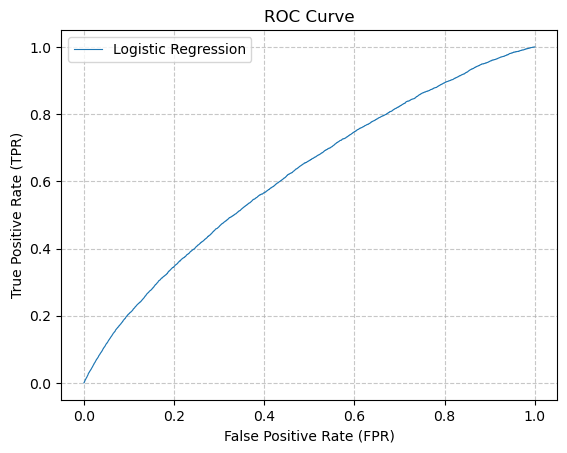

In [8]:
lr_model = LogisticRegression(penalty='none', max_iter=50)
#lr_model = LogisticRegression(penalty='none', max_iter=50, class_weight='balanced')
lr_model.fit(train_features_standard, train_label)

# 获取预测概率（正类概率）
test_label_prob = lr_model.predict_proba(test_features_standard)[:, 1]

auc_score = roc_auc_score(test_label, test_label_pred)
print(f"AUC: {auc_score}")

# 计算 FPR、TPR 和阈值
fpr, tpr, thresholds = roc_curve(test_label, test_label_prob)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, linewidth=0.8, label='Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()